In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = "/content/drive/MyDrive/Duke/Freshman Year/Sem 2/BME 590/Shrey Goel/Individual Project 2B/"

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Duke/Freshman Year/Sem 2/BME 590/Shrey Goel/Individual Project 2B/plddt_ppls_denovo_and_mutant_seqs.csv").drop(columns=["Unnamed: 0"])

In [9]:
df

,Sequence,Mutated Sequence,Perplexity,ESMFold_pLDDT,Mutated_ESMFold_pLDDT,AlphaFold2_pLDDT,Mutated_AlphaFold2_pLDDT
0,MTTFTSIVTTNPDFGGFEFYVEAGQQFDDSAYEEAYGVSVPTAVVE...,MTTWTSWVWTNPDFWGFEFYVEAGQQFDDSAWEEAWGVSVPTAWVE...,1.312910,67.1,69.4,90.8,87.0
1,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,MDEWWELSDLPWPRFIWGFAIAVTPWGWWWHDEFEYLTHTRSPRFT...,2.693028,36.2,36.0,90.1,86.2
2,MDEIDELSDLPTPRFIWGFAIAVTPDGKGGFEYISHDEYEAMTDEE...,MWEIDELSDLPWPRFIWGFAIAVWWDWKGGFWYISHDEYWWMTDEE...,3.134373,47.8,42.0,67.1,71.2
3,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,MDEIDELSDLPWPRFIWWFAWAVTPWGEVSHDEFEYLTHTRWPRFT...,3.302805,37.1,35.6,89.2,85.6
4,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,MDEIDELSWLPTPRWIWGFAIAVTPSGEVSHDEFEYWTHTRWPWFT...,3.458252,48.9,31.2,56.3,59.1
5,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,MDEIDELSDLPTWRFIWGFAIAVWPSGEWSHDEFEWWTHWWSPRFT...,3.940383,37.3,34.1,88.7,79.4
6,MTTFTSIVTTNPDFGGFEFYVEAGQQFDDSAYEEAYGVSVPTAVVE...,MWTFTSIVTTNPDFWGFEFYVEAGQQFDDSAYWEWYGVSVPTAWVE...,4.411345,67.2,55.7,88.2,91.2
7,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,WDEIWELSDLPTPRFIWGFAIAVTPSGWWSHDEFEYLTHWWWPRFW...,6.822530,38.2,33.3,64.6,64.2
8,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,MDEIDELSDLPTPRWIWWFAWWVTPSGEVSHDWFEYLTHTRSWRFT...,7.753764,38.2,33.3,84.6,78.6
9,MDEIDELSDLPTPRFIWGFAIAVTPSGEVSHDEFEYLTHTRSPRFT...,MWEIDWLSWLPTPRFWWWWAIAVTPSGEVSWDEFEYLTHTRSPRFT...,9.310184,37.9,34.6,83.8,79.5


R^2 value for ESMFold: 0.1984238905669803
R^2 value for AlphaFold2: 0.010813065820973633


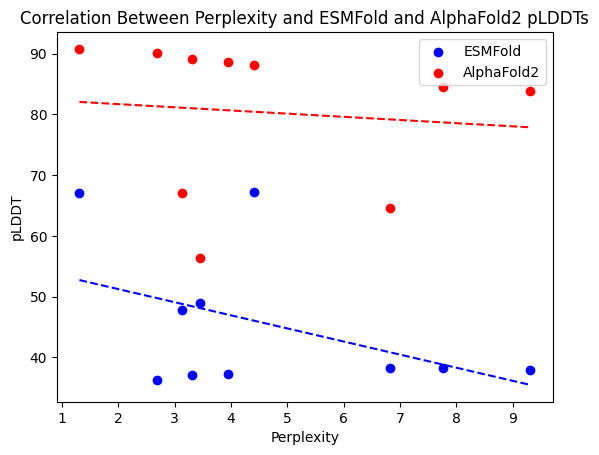

In [16]:
x = df["Perplexity"]
esmfold = df["ESMFold_pLDDT"]
af2 = df["AlphaFold2_pLDDT"]

# Plotting the scatter plot
plt.scatter(x, esmfold, color='blue', label='ESMFold')
esmfold_line = LinearRegression().fit(x.values.reshape(-1, 1), esmfold)
plt.plot(x, esmfold_line.predict(np.array(x).reshape(-1, 1)), color='blue', linestyle='--')
r2_esmfold = esmfold_line.score(x.values.reshape(-1, 1), esmfold)
print("R^2 value for ESMFold:", r2_esmfold)


plt.scatter(x, af2, color='red', label='AlphaFold2')
af2_line = LinearRegression().fit(x.values.reshape(-1, 1), af2)
r2_af2 = af2_line.score(x.values.reshape(-1, 1), af2)
plt.plot(x, af2_line.predict(np.array(x).reshape(-1, 1)), color='red', linestyle='--')
print("R^2 value for AlphaFold2:", r2_af2)

# Adding labels and title
plt.xlabel('Perplexity')
plt.ylabel('pLDDT')
plt.title('Correlation Between Perplexity and ESMFold and AlphaFold2 pLDDTs')
plt.legend()

# Displaying the plot
plt.show()